# Support Vector Machines:

### Setting everything up:

In [12]:
import sys
import os
import numpy as np
import sklearn

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## LINEAR SVM:


The first few cells will simply serve the purpose of generating the graphs in Ch-5

In [13]:
from sklearn.svm import SVC
from sklearn import datasets

iris=datasets.load_iris()
X=iris["data"][:,(2,3)] #petal length and width
y=iris["target"]

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
setosa_or_versicolor=(y==0)|(y==1)
X=X[setosa_or_versicolor]
y=y[setosa_or_versicolor]
    
#SVM classifier
svm_clf=SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X,y)


SVC(C=inf, kernel='linear')

Just playing with pandas here to see the dataset more clearly

In [15]:
import pandas as pd

iris_df=pd.DataFrame(iris["data"], columns=iris["feature_names"])
iris_df["target"]=iris["target"]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Saving figure large_margin_classification_plot


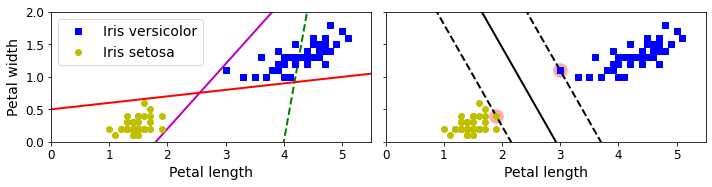

In [16]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

Saving figure sensitivity_to_feature_scales_plot


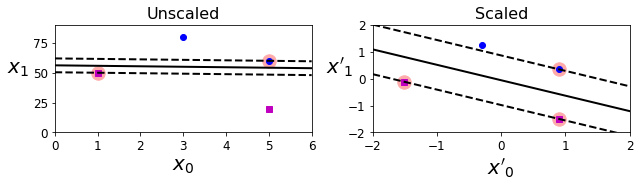

In [17]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")

Saving figure sensitivity_to_outliers_plot


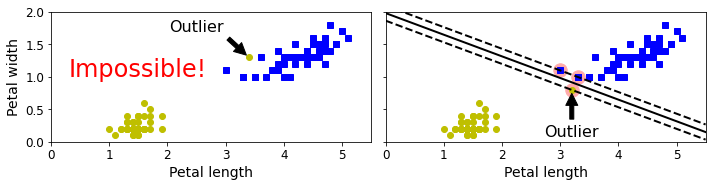

In [18]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()


### Ch-5 starts from here:

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf=Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))  #hinge loss function is something common to SVM (READ ABOUT IT!!)
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [20]:
svm_clf.predict([[5.5, 1.7]])  #predicting whether target has a value of 0,1 or 2

array([1])

In [21]:
##Low vs high margins

scaler=StandardScaler()
svm_clf1=LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2=LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1=Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc", svm_clf1)
])


scaled_svm_clf2=Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc", svm_clf2)
])

scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X,y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [22]:
# # Convert to unscaled parameters
# b1 = svm_clf1.decision_function([-scaler.mean_/ scaler.scale_])
# b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
# w1 = svm_clf1.coef_[0] / scaler.scale_
# w2 = svm_clf2.coef_[0] / scaler.scale_
# svm_clf1.intercept_ = np.array([b1])
# svm_clf2.intercept_ = np.array([b2])
# svm_clf1.coef_ = np.array([w1])
# svm_clf2.coef_ = np.array([w2])

# # Find support vectors (LinearSVC does not do this automatically)
# t = y * 2 - 1
# support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
# support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
# svm_clf1.support_vectors_ = X[support_vectors_idx1]
# svm_clf2.support_vectors_ = X[support_vectors_idx2]

Couldn't write code for gemerating plots. Some issue popped up (see above)

## NON-LINEAR SVM CLASSFICATION:

In [23]:
X1D=np.linspace(-4,4,9).reshape(-1,1)
X2D=np.c_[X1D,X1D**2]
y=np.array([0,0,1,1,1,1,1,0,0])

print(X1D,'\n',X2D)

[[-4.]
 [-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]] 
 [[-4. 16.]
 [-3.  9.]
 [-2.  4.]
 [-1.  1.]
 [ 0.  0.]
 [ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]]


Saving figure higher_dimensions_plot


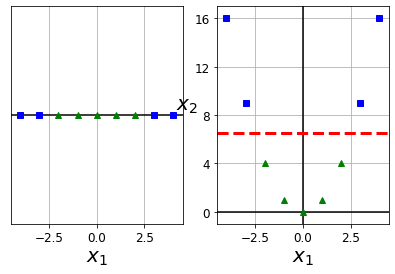

In [24]:
plt.figure()

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()



In [25]:
from sklearn.datasets import make_moons

make_moons


<function sklearn.datasets._samples_generator.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)>

We can see that the `make_moons` is a function and not a dataset like iris was.

In [26]:
from sklearn.preprocessing import PolynomialFeatures

X,y=make_moons(n_samples=100,noise=0.15)

polynomial_svm_clf=Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])


In [27]:
polynomial_svm_clf.fit(X,y)

c:\Users\Anushtup Nandy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

Visualising the dataset

In [28]:
import pandas as pd

make_moons_df=pd.DataFrame(X, columns=["X[0]","X[1]"])
make_moons_df["y"]=y

make_moons_df

,X[0],X[1],y
0,-0.249919,0.802460,0
1,0.499290,-0.124623,1
2,0.408248,-0.192275,1
3,-0.116009,0.292043,1
4,-0.746954,0.085070,0
...,...,...,...
95,1.656222,-0.313211,1
96,1.701486,-0.451691,1
97,0.174624,0.871926,0
98,0.178229,-0.217136,1


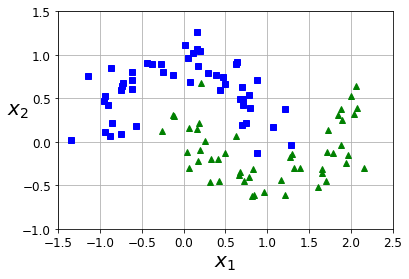

In [29]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Saving figure moons_polynomial_svc_plot


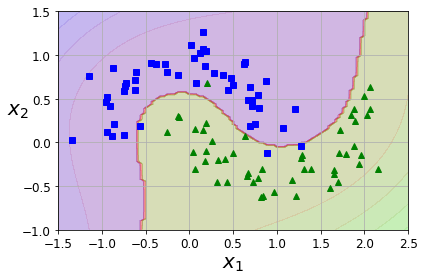

In [30]:
def plot_predictions(clf, axes):
    x0s=np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)

    X=np.c_[x0.ravel(), x1.ravel()]
    y_pred=clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()


### Polynomial Kernel

In [31]:
from sklearn.svm import SVC

poly_kernel_svm_clf=Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [32]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Saving figure moons_kernelized_polynomial_svc_plot


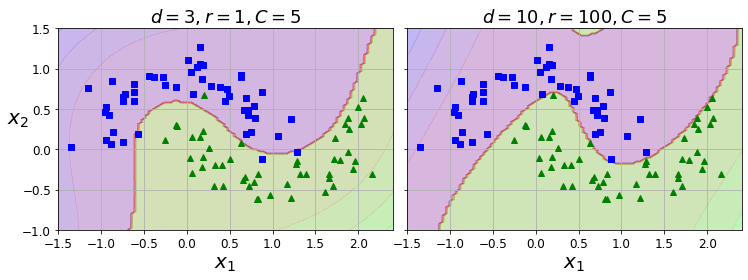

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

### Gaussian RBF kernel:

In [34]:
rbf_kernel_svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5,C=0.001))
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Making the plots for gaussian rbf:

Saving figure moons_rbf_svc_plot


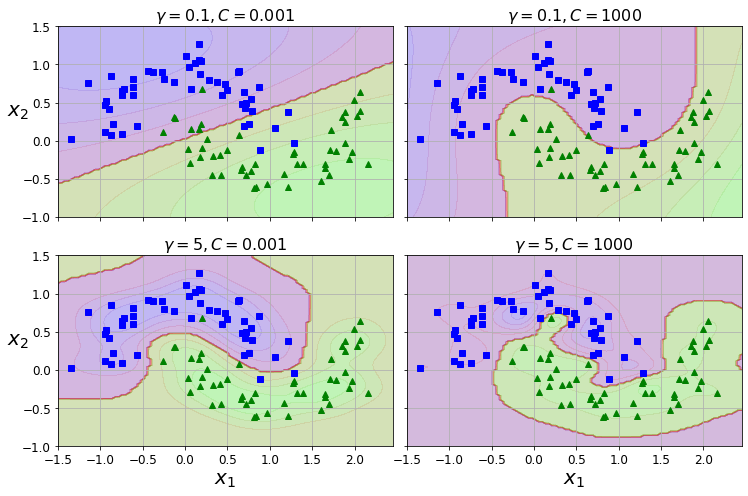

In [35]:
gamma1,gamma2=0.1, 5
C1,C2=0.001,1000
hyperparams=(gamma1,C1),(gamma1,C2),(gamma2,C1),(gamma2,C2)

svm_clfs=[]

for gamma,C in hyperparams:
    rbf_kernel_svm_clf_plt=Pipeline([
        ("scaler",StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    rbf_kernel_svm_clf_plt.fit(X,y)
    svm_clfs.append(rbf_kernel_svm_clf_plt)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i,svm_clfs in enumerate(svm_clfs):
    plt.sca(axes[i//2,i%2])
    plot_predictions(svm_clfs, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()
    
    

## SVM Regression:


In [36]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [37]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [38]:
svm_reg1=LinearSVR(epsilon=1.5, random_state=42)
svm_reg2=LinearSVR(epsilon=0.5, random_state=42)

svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])



Saving figure svm_regression_plot


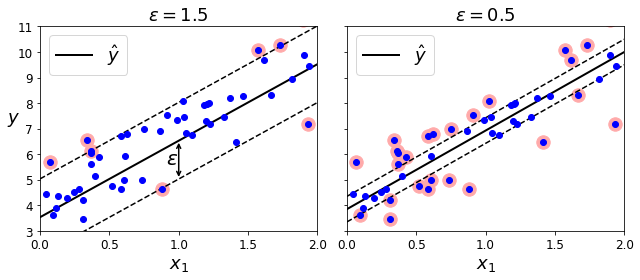

In [39]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()

# Exercises:


### Q9

In [40]:
from sklearn.datasets import fetch_openml
import pandas as pd

mnist=fetch_openml('mnist_784', version=1, cache=True, as_frame=False)  #as_frame prevents the dataset from coming to us as a pandas dataframe!

mnist


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [42]:
X=mnist["data"]
y=mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [43]:
#Scaling the data 
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled=scaler.fit_transform(X_test.astype(np.float32))

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)


c:\Users\Anushtup Nandy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [45]:
from sklearn.metrics import accuracy_score
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9214

92% accuracy is good, but we can try out more things like:

In [47]:
svm_rbf_clf=SVC(kernel="rbf", gamma="scale")

svm_rbf_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [48]:
y_pred_rbf=svm_rbf_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred_rbf)

0.9455333333333333

RBF kernel was superior to the linear one in this scenario! Although we used a small subset of the data.

Anyway, we can get a better performance just by randomized searching which hyperparameters to tune

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions={"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv= RandomizedSearchCV(svm_rbf_clf, param_distributions, n_iter=10, verbose=2, cv=3)

rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=9.832802589188683, gamma=0.004453382949384448; total time=   0.1s
[CV] END ....C=9.832802589188683, gamma=0.004453382949384448; total time=   0.1s
[CV] END ....C=9.832802589188683, gamma=0.004453382949384448; total time=   0.1s
[CV] END ....C=2.2208795470067333, gamma=0.00515935814495688; total time=   0.1s
[CV] END ....C=2.2208795470067333, gamma=0.00515935814495688; total time=   0.1s
[CV] END ....C=2.2208795470067333, gamma=0.00515935814495688; total time=   0.1s
[CV] END ...C=10.06828441545754, gamma=0.0035015835937028984; total time=   0.1s
[CV] END ...C=10.06828441545754, gamma=0.0035015835937028984; total time=   0.1s
[CV] END ...C=10.06828441545754, gamma=0.0035015835937028984; total time=   0.1s
[CV] END ...C=7.476901205413624, gamma=0.0010023992983448854; total time=   0.0s
[CV] END ...C=7.476901205413624, gamma=0.0010023992983448854; total time=   0.0s
[CV] END ...C=7.476901205413624, gamma=0.0010023

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029A893B7F70>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029A89ADAF80>},
                   verbose=2)

In [50]:
rnd_search_cv.best_estimator_


SVC(C=7.476901205413624, gamma=0.0010023992983448854)

In [51]:
rnd_search_cv.best_score_


0.8629917342492193

Somehow this came out to be lower than the earlier ones!

but we may give this to the fact that we used a model with very very less estimators. Now we can apply this to the entire dataset.

**The following cell might end up taking several minutes to even an hour to run, do not run on anywhere except on kaggle, AWS or collab.**

In [ ]:
#rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)


In [52]:
# y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
# accuracy_score(y_train, y_pred)

# y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
# accuracy_score(y_test, y_pred)

# y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
# accuracy_score(y_test, y_pred)

### Q10:

In [53]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [56]:
#scaling the data:

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

c:\Users\Anushtup Nandy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [58]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948642

In [59]:
np.sqrt(mse)


0.9819256687727764

In this training set, the targets are tens of thousands of dollars. The RMSE gives a rough idea of the kind of error you should expect (with a higher weight for large errors): so with this model we can expect errors somewhere around $10,000. Not great. Let's see if we can do better with an RBF Kernel. We will use randomized search with cross validation to find the appropriate hyperparameter values for C and gamma:

In [61]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   7.5s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   7.4s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   7.5s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   7.3s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   7.2s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   7.3s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   7.0s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   7.1s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   7.1s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   6.9s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   6.9s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029A893B7AF0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029A8BDD6FE0>},
                   random_state=42, verbose=2)

In [62]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643928)

In [63]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785357

In [64]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.5929168385528746

## Basic Steps to solving SVM related problems:

1. First identify if it's classification or regression
2. Make the training and test sets (before doing that explore the data a bit, like copy it to pandas, check correlations, graphs, etc.)
3. Scale the data (mostly needed, but check once anyway)
4. Play with linear, kernel methods, and check the *accuracy* and/or *rmse*
5. If needed do a grid search or a randomized search (CV).
6. if found out what's to be done, probably create a *PIPELINE*, and then complete the ML problem!